# Code analyse indicateurs

Ce code R permet de reproduire les résultats du manuscrit intitulé 

_Comment les enseignants évaluent-ils leurs pratiques ? Analyse des indicateurs mobilisés dans des projets de recherche menés par des enseignants en France_

**Auteurs**: Ignacio Atal, Maëlle Crosse, Elsa Chusseau, Marine Lanteri, Cyril Drouot

Les données nécessaires sont disponibles dans le repositoire GitHub [https://github.com/iatal/indicateursPCh](https://github.com/iatal/indicateursPCh)

**Remarque:**
- Les données démographiques des co-auteurs des défis (genre, secteur de l'éducation, rôle dans l'éducation, ...) ne sont pas raccordées aux défis auxquels ils sont co-auteurs afin d'éviter tout risque d'identification des personnes et partage de données personnelles.

In [1]:
cat("Ce code a été conçu avec la version R suivante:")
R.Version()$version.string

Ce code a été conçu avec la version R suivante:

[1] "R version 3.6.3 (2020-02-29)"

## Upload data

In [2]:
DI <- read.csv("Indicateurs_donnees_propres.csv")
DD <- read.csv("Defis_donnes_propres.csv")
DA <- read.csv("Coauteurs_donnes_propres.csv")

In [3]:
cat("Noms des variables données indicateurs:")
names(DI)

Noms des variables données indicateurs:

[1] "defi"                                                                                         
 [2] "Intitulé"                                                                                     
 [3] "cat_defi"                                                                                     
 [4] "nb_coauteurs"                                                                                 
 [5] "Indicateur"                                                                                   
 [6] "Quelle.donnée.faut.il.surveiller.."                                                           
 [7] "Exemples.de.réponses.possibles"                                                               
 [8] "Afin.de.suivre.les.progrès..à.quelle.fréquence.est.il.nécessaire.de.surveiller.cette.donnée.."
 [9] "Qui.peut.renseigner.cette.donnée.."                                                           
[10] "Champ.d.application"                                                                          
[11] "clarte_cons"                                                                                  
[12] "cible_cons"                                                                                   
[13] "qua_cons"                                                                                     
[14] "finpro_cons"                                                                                  
[15] "clarte_rev1"                                                                                  
[16] "clarte_rev2"                                                                                  
[17] "cible_rev1"                                                                                   
[18] "cible_rev2"                                                                                   
[19] "qua_rev1"                                                                                     
[20] "qua_rev2"                                                                                     
[21] "finpro_rev1"                                                                                  
[22] "finpro_rev2"                                                                                  
[23] "rev_id_12"

Une ligne par indicateur:
- `defi`: numéro unique du défi
- `Intitulé`: intitulé du défi
- `cat_defi`: catégorie du défi selon la thématique éducative
- `nb_coauteurs`: nombre de co-auteurs du défi correspondant
- `Indicateur`: identifiant unique de l'indicateur au sein du défi
- `Quelle.donnée....`, `Exemples.de.réponses...`, `Afin.de.suivre...`, `Qui.peut.renseigner...`, `Champ.d.app...`: verbatims extraits des tableaux des indicateurs de chaque défi servant de base pour le codage
- `clarte_cons`: consensus trouvé par l'équipe de recherche à la question: _"Est-ce que l'énoncé de l’indicateur est clair/compréhensible ?"_
- `cible_cons`: consensus trouvé par l'équipe de recherche à la question: _"Est-ce que l'indicateur permet d’évaluer précisément le ou les objectifs (pédagogiques/éducatifs) du Défi ?"_
- `qua_cons`: consensus trouvé par l'équipe de recherche à la question: _"Est-ce que l’indicateur est quantitatif ou qualitatif ?"_
- `finpro_cons`: consensus trouvé par l'équipe de recherche à la question: _"Est-ce que l'indicateur permet de rendre compte de l’atteinte d’une finalité pédagogique ou de la mise en place d’un processus pédagogique ?"_
- `clarte_rev1`, `clarte_rev1`, `clarte_rev2`, `cible_rev1`, `cible_rev2`, `qua_rev1`, `qua_rev2`, `finpro_rev1`, `finpro_rev2`: réponses données par les anotateurs 1 et 2 pour chacune des 4 questions de la grille d'analyse
- `rev_id_12`: identité des anotateurs 1 et 2 (dans l'ordre)

In [4]:
cat("Noms des variables données défi:")
names(DD)

Noms des variables données défi:

[1] "defi"          "Intitule"      "cat_defi_rev1" "cat_defi_rev2"
[5] "cat_defi_cons" "nb_coauteurs"

Une ligne par défi
- `defi`: numéro unique du défi
- `Intitulé`: intitulé du défi
- `nb_coauteurs`: nombre de co-auteurs du défi correspondant
- `cat_defi_cons`: consensus trouvé par l'équipe de recherche concernant la catégorie du défi selon la thématique éducative
- `cat_defi_rev1`,`cat_defi_rev2`: réponses données par les anotateurs 1 et 2 pour la catégorie du défi

In [5]:
cat("Noms des variables données co-auteurs:")
names(DA)

Noms des variables données co-auteurs:

[1] "user_id"               "Genre"                 "is_teaching"          
 [4] "is_preservice"         "is_formateur"          "is_directeur"         
 [7] "is_inspecteur"         "is_other_role"         "is_researcher"        
[10] "teaching_level"        "trainer_support_level"

Une ligne par co-auteur
- `user_id`: numéro unique par co-auteur
- `Genre`: genre
- `is_teaching`: est-ce que la personne est enseignant·e
- `is_preservice`: est-ce que la personne est étudiant·e en vue de devenir enseignant·e
- `is_formateur`: est-ce que la personne est formateur·rice ou accompagnateur·rice pédagogique d'enseignant·es: formateur·rice, conseiller pédagogique, ingénieur pédagogique, ...
- `is_directeur`: est-ce que la personne est personnel d'encadrement dans un établissement éducatif (directeur, principal, proviseur, ...
- `is_inspecteur`: est-ce que la personne a une mission d'encadrement à un niveau territorial: inspecteur·rice, rôle au niveau d'une académie de l'éducation nationale, VP université, ...
- `is_researcher`: est-ce que la personne est chercheur·se académique/universitaire sur des thématiques en lien avec l'éducation et la formation
- `is_other`: est-ce que la personne a un autre rôle (membre associatif, accompagnant éducatif et social, psychologue scolaire, ...)
- `teaching_level`: pour les personnes avec le rôle enseignant ou preservice, dans quel secteur de l'éducation elles enseignent (primaire, secondaire, supérieur, autre)
- `trainer_support_level`: pour les personnes avec le rôle formateur, directeur ou inspecteur, dans quel secteur de l'éducation ils agissent

## Description co-auteurs

In [6]:
#Nombre de co-auteurs
cat(paste("Nombre de co-auteurs ayant consenti à utiliser leurs données démographiques:",nrow(DA)))

Nombre de co-auteurs ayant consenti à utiliser leurs données démographiques: 94

In [7]:
cat("Genre (A/B/N: Autre, binaire, non rapporté)")
cbind(nb = table(DA$Genre),
pourc = round(100*table(DA$Genre)/nrow(DA),1))

Genre (A/B/N: Autre, binaire, non rapporté)

,nb,pourc
A/B/NR,6,6.4
F,58,61.7
M,30,31.9


In [8]:
cat("Distribution par rôle")
do.call("rbind",list(
data.frame(role = "Enseignant·e",
nb = sum(DA$is_teaching),
pourc = round(100*sum(DA$is_teaching)/nrow(DA),1)),

data.frame(role = "Etudiant·e pour devenir enseignant·e",
nb = sum(DA$is_preservice),
pourc = round(100*sum(DA$is_preservice)/nrow(DA),1)),

data.frame(role = "Formateur",
nb = sum(DA$is_formateur),
pourc = round(100*sum(DA$is_formateur)/nrow(DA),1)),

data.frame(role = "Directeur",
nb = sum(DA$is_directeur),
pourc = round(100*sum(DA$is_directeur)/nrow(DA),1)),

data.frame(role = "Inspecteur",
nb = sum(DA$is_inspecteur),
pourc = round(100*sum(DA$is_inspecteur)/nrow(DA),1)),

data.frame(role = "Chercheur",
nb = sum(DA$is_researcher),
pourc = round(100*sum(DA$is_researcher)/nrow(DA),1)),

data.frame(role = "Autre",
nb = sum(DA$is_other),
pourc = round(100*sum(DA$is_other)/nrow(DA),1))))


Distribution par rôle

role,nb,pourc
<fct>,<int>,<dbl>
Enseignant·e,62,66.0
Etudiant·e pour devenir enseignant·e,1,1.1
Formateur,31,33.0
Directeur,12,12.8
Inspecteur,6,6.4
Chercheur,8,8.5
Autre,7,7.4


In [9]:
#Secteur de l'éducation enseignants
cat("Distribution par secteur de l'éducation pour les enseignants")

cbind(
    nb = table(DA$teaching_level[DA$is_teaching | DA$is_preservice], useNA = 'always'),
    pourc = round(100*table(DA$teaching_level[DA$is_teaching | DA$is_preservice], useNA = 'always')/
          nrow(DA),1))


Distribution par secteur de l'éducation pour les enseignants

,nb,pourc
,0,0.0
autre,2,2.1
primaire,17,18.1
secondaire,35,37.2
supérieur,8,8.5
NA,0,0.0


In [10]:
#Secteur de l'éducation formateurs, chefs établissement, etc...
cat("Distribution par secteur de l'éducation pour les formateurs, chefs établissement, etc")

cbind(
    nb = table(DA$trainer_support_level[DA$is_formateur | DA$is_directeur | DA$is_inspecteur | DA$is_other_role], useNA = 'always'),
    pourc = round(100*table(DA$trainer_support_level[DA$is_formateur | DA$is_directeur | DA$is_inspecteur | DA$is_other_role], useNA = 'always')/
          nrow(DA),1))


Distribution par secteur de l'éducation pour les formateurs, chefs établissement, etc

,nb,pourc
,0,0.0
autre,4,4.3
primaire,12,12.8
secondaire,24,25.5
supérieur,12,12.8
NA,0,0.0


## Description globale défis - indicateurs

In [11]:
#Nombre total de défis
cat(paste("Nombre défis:",nrow(DD)))

Nombre défis: 31

In [12]:
#Nombre total d'indicateurs
cat(paste("Nombre total indicateurs:",nrow(DI)))

Nombre total indicateurs: 226

In [13]:
#Nombre d'indicateurs par défi
s <- summary(as.numeric((table(DI$defi))))
cat(paste("Nombre median (min-max) d'indicateurs par défi: ",
           round(s["Median"],1)," (",s["Min."],"-",s["Max."],")",sep=""))

Nombre median (min-max) d'indicateurs par défi: 6 (1-25)

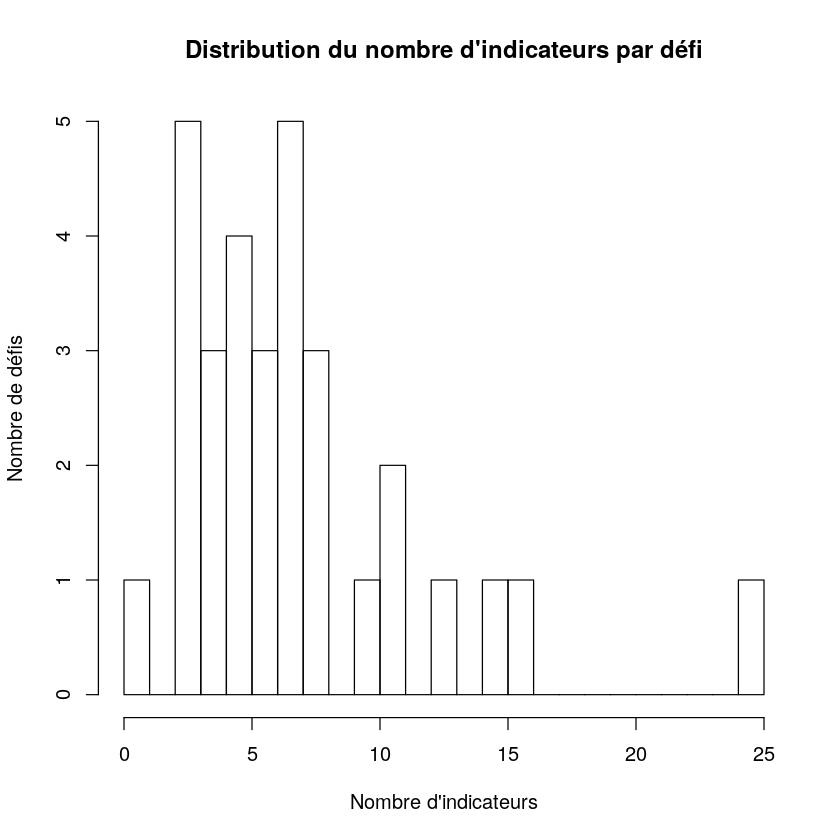

In [14]:
hist(as.numeric((table(DI$defi))),breaks = c(0:25),
     xlab = "Nombre d'indicateurs",
     ylab = "Nombre de défis",
     main = "Distribution du nombre d'indicateurs par défi")

In [15]:
#Nb de défis par "catégorie de défis / grande thématique"
T <- table(DD$cat_defi_cons)
cat("Nb de défis par catégorie / grande thématique")
sort(T)

Nb de défis par catégorie / grande thématique


                Rendre visible les résultats d’apprentissage des élèves / étudiant·es 
                                                                                    2 
                                                              Gérer les comportements 
                                                                                    5 
                       Engager les élèves / étudiants dans les tâches d’apprentissage 
                                                                                   10 
Traiter les sujets du programme de façon compréhensible pour les élèves / étudiant·es 
                                                                                   14 

In [16]:
#Nb de défis selon nb de co-auteurs
T <- table(nb_coauth = DD$nb_coauteurs)
cat("Nb de défis selon de nb de coauteurs")
T

Nb de défis selon de nb de coauteurs

nb_coauth
 1  2  3  4  5  6  7 11 13 
 7  7  5  1  2  5  1  1  2 

In [17]:
#Nb de défis avec un seul auteur
cat("Nb de défis avec un seul auteur:",sum(DD$nb_coauteurs==1))

Nb de défis avec un seul auteur: 7

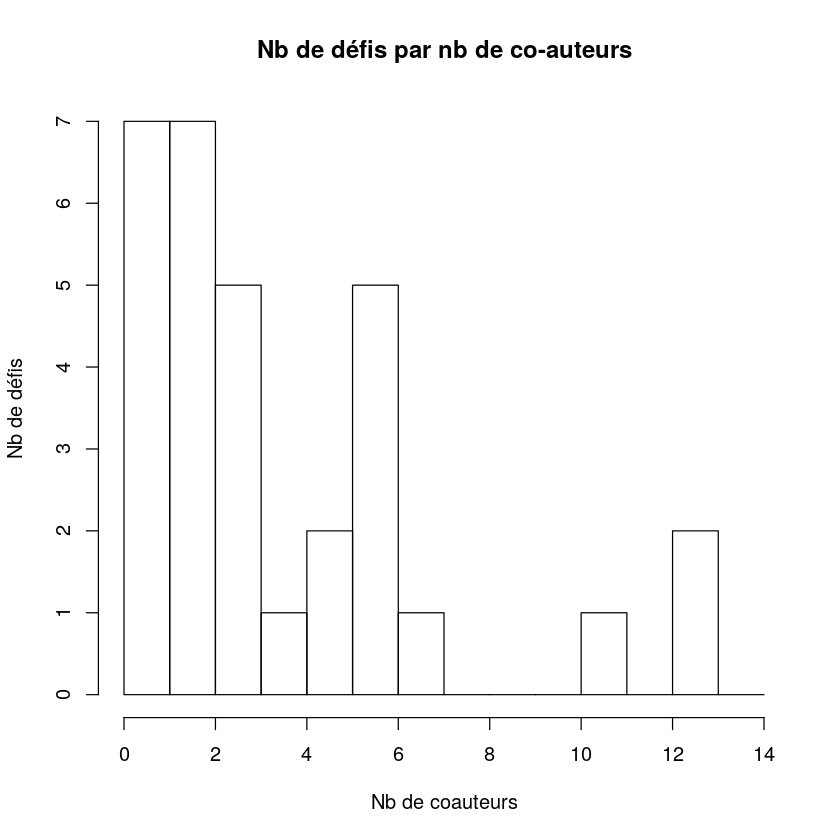

In [18]:
hist(DD$nb_coauteurs,breaks = c(0:14),xlab = "Nb de coauteurs", ylab = "Nb de défis",
     main = "Nb de défis par nb de co-auteurs")

## Analyse indicateurs univariées

In [19]:
#Indicateurs peu clairs
cat(paste("Nombre d'indicateurs jugés peu clairs:",sum(DI$clarte_cons=="Non"),"(sur",nrow(DI),")\n"))

cat("Ces indicateurs ont été écartés de l'analyse")

Nombre d'indicateurs jugés peu clairs: 14 (sur 226 )
Ces indicateurs ont été écartés de l'analyse

In [20]:
cat("Indicateurs peu clairs")
DI[DI$clarte_cons=="Non",c("defi","Intitulé",'Indicateur',
                         'Quelle.donnée.faut.il.surveiller..','Exemples.de.réponses.possibles')]

Indicateurs peu clairs

,defi,Intitulé,Indicateur,Quelle.donnée.faut.il.surveiller..,Exemples.de.réponses.possibles
,<fct>,<fct>,<fct>,<fct>,<fct>
13,45,Comment améliorer le climat scolaire au sein d’une école?,Indicateur #3a,Comment se percoivent les élèves dans leur groupe de travail ?,
14,45,Comment améliorer le climat scolaire au sein d’une école?,Indicateur #3b,Comment se percoivent les élèves dans leur classe ?,
15,45,Comment améliorer le climat scolaire au sein d’une école?,Indicateur #3c,Comment se percoivent les élèves dans leur section d'enseignement ?,
16,45,Comment améliorer le climat scolaire au sein d’une école?,Indicateur #3d,Comment se percoivent les élèves dans leur établissement ?,
22,45,Comment améliorer le climat scolaire au sein d’une école?,Indicateur #5a,Retour des élèves: est-ce que l'action était utile ?,
23,45,Comment améliorer le climat scolaire au sein d’une école?,Indicateur #5b,Retour des élèves: est-ce qu'ils veulent rejouer l'action ?,
24,45,Comment améliorer le climat scolaire au sein d’une école?,Indicateur #5c,Retour des élèves: est-ce qu'ils ont reinvesti l'action ?,
25,45,Comment améliorer le climat scolaire au sein d’une école?,Indicateur #5d,Retour des élèves: est-ce qu'ils ont reutilisé l'action ?,
62,58,Comment libérer ses élèves du manque de confiance en soi vis à vis de leurs apprentissages ?,Indicateur #4,Bien-être psychique de l'élève,L'élève a-t-il changé son comportement en société ?


In [21]:
#On les supprime de la base de données pour analyse
DTI <- DI
DI <- DI[DI$clarte_cons!="Non",]

In [22]:
#Taille de la base d'analyse
cat(paste("Nombre d'indicateurs analysés:",nrow(DI)))

Nombre d'indicateurs analysés: 212

In [23]:
#Indicateurs jugés pertinents - en lien direct
cat(paste("Nombre d'indicateurs jugés pertinents - en lien direct avec le défi: ",
            sum(DI$cible_cons=="Oui"),
            " (",round(100*sum(DI$cible_cons=="Oui")/nrow(DI),1),
           "%)\n",sep=""))

#Indicateurs jugés non pertinents - pas en lien direct
cat(paste("Nombre d'indicateurs jugés non pertinents - pas en lien direct avec le défi: ",
            sum(DI$cible_cons=="Non"),
            " (",round(100*sum(DI$cible_cons=="Non")/nrow(DI),1),
           "%)",sep=""))

Nombre d'indicateurs jugés pertinents - en lien direct avec le défi: 181 (85.4%)
Nombre d'indicateurs jugés non pertinents - pas en lien direct avec le défi: 31 (14.6%)

In [24]:
#Indicateurs quali vs quanti
cat(paste("Nombre d'indicateurs quantitatifs: ",
            sum(DI$qua_cons=="Quantitatif"),
            " (",round(100*sum(DI$qua_cons=="Quantitatif")/nrow(DI),1),
           "%)\n",sep=""))

cat(paste("Nombre d'indicateurs qualitatifs: ",
            sum(DI$qua_cons=="Qualitatif"),
            " (",round(100*sum(DI$qua_cons=="Qualitatif")/nrow(DI),1),
           "%)\n",sep=""))

cat(paste("Nombre d'indicateurs non définis (quanti ou quali possible): ",
            sum(DI$qua_cons=="Non défini (quanti ou quali possible)"),
            " (",round(100*sum(DI$qua_cons=="Non défini (quanti ou quali possible)")/nrow(DI),1),
           "%)",sep=""))

Nombre d'indicateurs quantitatifs: 187 (88.2%)
Nombre d'indicateurs qualitatifs: 13 (6.1%)
Nombre d'indicateurs non définis (quanti ou quali possible): 12 (5.7%)

In [25]:
#Indicateurs finalité vs process
#Pour cette analyse nous ne traitons pas les indicateurs jugés non pertinents - pas en lien direct
cat(paste("Analyse indicateurs finalité vs process basée sur",
            sum(!is.na(DI$finpro_cons)),"indicateurs (ceux jugés pertinents - en lien direct)\n"))

cat(paste("Nombre d'indicateurs de finalité: ",
            sum(DI$finpro_cons=="Finalité" & !is.na(DI$finpro_cons)),
            " (",round(100*sum(DI$finpro_cons=="Finalité" & !is.na(DI$finpro_cons))/sum(!is.na(DI$finpro_cons)),1),
           "%)\n",sep=""))

cat(paste("Nombre d'indicateurs de processus: ",
            sum(DI$finpro_cons=="Processus" & !is.na(DI$finpro_cons)),
            " (",round(100*sum(DI$finpro_cons=="Processus" & !is.na(DI$finpro_cons))/sum(!is.na(DI$finpro_cons)),1),
           "%)\n",sep=""))

Analyse indicateurs finalité vs process basée sur 181 indicateurs (ceux jugés pertinents - en lien direct)
Nombre d'indicateurs de finalité: 131 (72.4%)
Nombre d'indicateurs de processus: 50 (27.6%)


In [26]:
#Nb de Défis avec uniquement des indicateurs quanti
cat("Nb défis avec uniquement des indicateurs quantitatifs:",
sum(tapply(
    DI$qua_cons,DI$defi,function(x){
        sum(x=="Quantitatif")==length(x)
    }
)))

Nb défis avec uniquement des indicateurs quantitatifs: 20

In [27]:
cat("Nb défis avec uniquement des indicateurs quantitatifs:",

sum(tapply(
    DI$qua_cons,DI$defi,function(x){
        sum(x=="Qualitatif")==length(x)
    }
)))

Nb défis avec uniquement des indicateurs quantitatifs: 0

In [28]:
cat("Nb défis avec des indicateurs ET quantitatifs ET qualitatifs:",

sum(tapply(
    DI$qua_cons,DI$defi,function(x){
        ((sum(x=="Qualitatif")!=0) & (sum(x=="Quantitatif")!=0)) | (sum(x=="Non défini (quanti ou quali possible)")!=0)
    }
)))

Nb défis avec des indicateurs ET quantitatifs ET qualitatifs: 11

In [29]:
#Nb de défis avec uniquement des indicateurs jugés non pertinents
cat("Nb défis avec uniquement des indicateurs jugés non pertinents:",

sum(by(
    DI,DI$defi,function(x){
        sum(!is.na(x$finpro_cons))==0
    }
)))

Nb défis avec uniquement des indicateurs jugés non pertinents: 2

In [30]:
#Nb de Défis avec uniquement des indicateurs finalité
cat("Nb défis avec uniquement des indicateurs de finalité:",
sum(by(
    DI,DI$defi,function(x){
        sum(x$finpro_cons[!is.na(x$finpro_cons)]=="Finalité")==sum(!is.na(x$finpro_cons)) & 
        sum(!is.na(x$finpro_cons))!=0
    }
)))

Nb défis avec uniquement des indicateurs de finalité: 13

In [31]:
#Nb de Défis avec uniquement des indicateurs process
cat("Nb défis avec uniquement des indicateurs de processus:",
sum(
by(
    DI,DI$defi,function(x){
        sum(x$finpro_cons[!is.na(x$finpro_cons)]=="Processus")==sum(!is.na(x$finpro_cons)) & 
        sum(!is.na(x$finpro_cons))!=0
    }
)))

Nb défis avec uniquement des indicateurs de processus: 3

In [32]:
cat("Nb défis avec des indicateurs ET de finalité ET de processus:",

sum(by(
    DI,DI$defi,function(x){
        c("Processus")%in%x$finpro_cons[!is.na(x$finpro_cons)] & 
        c("Finalité")%in%x$finpro_cons[!is.na(x$finpro_cons)] & 
        sum(!is.na(x$finpro_cons))!=0
    }
)))

Nb défis avec des indicateurs ET de finalité ET de processus: 13

In [33]:
#Créés indiv vs collectivement
cat("Nb indicateurs créés individuellement vs collaborativement")
table(indiv = DI$nb_coauteurs==1)
cat("En pourcentages")
round(100*table(indiv = DI$nb_coauteurs==1)/nrow(DI),1)

Nb indicateurs créés individuellement vs collaborativement

indiv
FALSE  TRUE 
  169    43 

En pourcentages

indiv
FALSE  TRUE 
 79.7  20.3 

## Analyse bi-variées

In [34]:
cat("Quanti/Quali vs Finalité/Processus en nombre absolu")
table(DI$qua_cons[!is.na(DI$finpro_cons)],DI$finpro_cons[!is.na(DI$finpro_cons)])

cat("\nQuanti/Quali vs Finalité/Processus en nombre pourcentages")
round(100*table(DI$qua_cons[!is.na(DI$finpro_cons)],DI$finpro_cons[!is.na(DI$finpro_cons)])/rep(as.numeric(table(DI$finpro_cons[!is.na(DI$finpro_cons)])),each=3),1)

Quanti/Quali vs Finalité/Processus en nombre absolu

                                       
                                        Finalité Processus
  Non défini (quanti ou quali possible)        6         6
  Qualitatif                                   7         3
  Quantitatif                                118        41


Quanti/Quali vs Finalité/Processus en nombre pourcentages

                                       
                                        Finalité Processus
  Non défini (quanti ou quali possible)      4.6      12.0
  Qualitatif                                 5.3       6.0
  Quantitatif                               90.1      82.0

In [35]:
cat("Thématique vs Quanti/Quali")
t(rbind(table(DI$qua_cons[!is.na(DI$qua_cons)],DI$cat_defi[!is.na(DI$qua_cons)]),

round(100*table(DI$qua_cons[!is.na(DI$qua_cons)],DI$cat_defi[!is.na(DI$qua_cons)])/rep(as.numeric(table(DI$cat_defi[!is.na(DI$qua_cons)])),each=3),1)))

Thématique vs Quanti/Quali

,Non défini (quanti ou quali possible),Qualitatif,Quantitatif,Non défini (quanti ou quali possible),Qualitatif,Quantitatif
Engager les élèves / étudiants dans les tâches d’apprentissage,9,5,57,12.7,7.0,80.3
Gérer les comportements,1,0,30,3.2,0.0,96.8
Rendre visible les résultats d’apprentissage des élèves / étudiant·es,0,1,3,0.0,25.0,75.0
Traiter les sujets du programme de façon compréhensible pour les élèves / étudiant·es,2,7,97,1.9,6.6,91.5


In [36]:
cat("Thématique vs Finalité/Process")
t(rbind(table(DI$finpro_cons[!is.na(DI$finpro_cons)],DI$cat_defi[!is.na(DI$finpro_cons)]),

round(100*table(DI$finpro_cons[!is.na(DI$finpro_cons)],DI$cat_defi[!is.na(DI$finpro_cons)])/rep(as.numeric(table(DI$cat_defi[!is.na(DI$finpro_cons)])),each=2),1)))

Thématique vs Finalité/Process

,Finalité,Processus,Finalité,Processus
Engager les élèves / étudiants dans les tâches d’apprentissage,45,25,64.3,35.7
Gérer les comportements,20,1,95.2,4.8
Rendre visible les résultats d’apprentissage des élèves / étudiant·es,1,2,33.3,66.7
Traiter les sujets du programme de façon compréhensible pour les élèves / étudiant·es,65,22,74.7,25.3


In [37]:
cat("Quanti/quali vs Collab/indiv\n
Indicateurs créés individuellement")
cbind(nb=table(DI$qua_cons[DI$nb_coauteurs==1]),
      pourc = round(100*table(DI$qua_cons[DI$nb_coauteurs==1])/sum(DI$nb_coauteurs==1),1))

cat("\n
Indicateurs créés collaborativement")

cbind(nb = table(DI$qua_cons[DI$nb_coauteurs>1]),
      pourc = round(100*table(DI$qua_cons[DI$nb_coauteurs>1])/sum(DI$nb_coauteurs>1),1))

Quanti/quali vs Collab/indiv

Indicateurs créés individuellement

,nb,pourc
Non défini (quanti ou quali possible),2,4.7
Qualitatif,0,0.0
Quantitatif,41,95.3




Indicateurs créés collaborativement

,nb,pourc
Non défini (quanti ou quali possible),10,5.9
Qualitatif,13,7.7
Quantitatif,146,86.4


In [38]:
#Final/Process vs Collab/indiv
cat("Finalité/Process vs Collab/indiv\n
Indicateurs créés individuellement")

cbind(nb = table(DI$finpro_cons[DI$nb_coauteurs==1 & !is.na(DI$finpro_cons)]),
      pourc = round(100*table(DI$finpro_cons[DI$nb_coauteurs==1 & !is.na(DI$finpro_cons)])/sum(DI$nb_coauteurs==1  & !is.na(DI$finpro_cons)),1))

cat("\n
Indicateurs créés collaborativement")

cbind(nb = table(DI$finpro_cons[DI$nb_coauteurs>1  & !is.na(DI$finpro_cons)]),
      pourc = round(100*table(DI$finpro_cons[DI$nb_coauteurs>1  & !is.na(DI$finpro_cons)])/sum(DI$nb_coauteurs>1  & !is.na(DI$finpro_cons)),1))

Finalité/Process vs Collab/indiv

Indicateurs créés individuellement

,nb,pourc
Finalité,34,81
Processus,8,19




Indicateurs créés collaborativement

,nb,pourc
Finalité,97,69.8
Processus,42,30.2


# Accord inter-juges

In [39]:
library(vcd)
library(gdata)

Loading required package: grid

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.



gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.


Attaching package: ‘gdata’


The following object is masked from ‘package:stats’:

    nobs


The following object is masked from ‘package:utils’:

    object.size


The following object is masked from ‘package:base’:

    startsWith




In [40]:
cat("Version du package vcd")
    packageVersion("vcd")

Version du package vcd

[1] ‘1.4.12’

### Clarté

In [41]:
T <- as.table(table(DTI$clarte_rev1[!is.na(DTI$clarte_rev1) & !is.na(DTI$clarte_rev2)],
                    DTI$clarte_rev2[!is.na(DTI$clarte_rev1) & !is.na(DTI$clarte_rev2)]))
cat("Kappa clarté - unweighted value")
Kappa(T)

Kappa clarté - unweighted value

             value     ASE      z Pr(>|z|)
Unweighted 0.05957 0.09997 0.5959   0.5512
Weighted   0.05957 0.09997 0.5959   0.5512

In [42]:
# Total number of observations
n <- sum(T)
# Observed agreement (sum of diagonal values)
observed_agreement <- sum(diag(T)) / n
# Calculate PABAK
PABAK <- 2 * observed_agreement - 1
# Print the PABAK value
cat("PABAK clarté:", PABAK, "\n")

PABAK clarté: 0.825641 


### Cible

In [43]:
T <- as.table(table(DTI$cible_rev1[!is.na(DTI$cible_rev1) & !is.na(DTI$cible_rev2)],
                    DTI$cible_rev2[!is.na(DTI$cible_rev1) & !is.na(DTI$cible_rev2)]))
cat("Kappa cible - unweighted value")
Kappa(T)

Kappa cible - unweighted value

            value    ASE     z Pr(>|z|)
Unweighted 0.3675 0.1042 3.527  0.00042
Weighted   0.3675 0.1042 3.527  0.00042

In [44]:
# Total number of observations
n <- sum(T)
# Observed agreement (sum of diagonal values)
observed_agreement <- sum(diag(T)) / n
# Calculate PABAK
PABAK <- 2 * observed_agreement - 1
# Print the PABAK value
cat("PABAK cible:", PABAK, "\n")

PABAK cible: 0.7386364 


### Quanti vs quali

In [45]:
T <- as.table(table(DTI$qua_rev1[!is.na(DTI$qua_rev1) & !is.na(DTI$qua_rev2)],
                    DTI$qua_rev2[!is.na(DTI$qua_rev1) & !is.na(DTI$qua_rev2)]))
cat("Kappa quanti vs quali - unweighted value")
Kappa(T)

Kappa quanti vs quali - unweighted value

            value     ASE     z  Pr(>|z|)
Unweighted 0.4619 0.08738 5.286 1.248e-07
Weighted   0.4456 0.08532 5.222 1.766e-07

In [46]:
# Total number of observations
n <- sum(T)
# Observed agreement (sum of diagonal values)
observed_agreement <- sum(diag(T)) / n
# Calculate PABAK
PABAK <- 2 * observed_agreement - 1
# Print the PABAK value
cat("PABAK quanti/quali:", PABAK, "\n")

PABAK quanti/quali: 0.7471264 


### Finalité vs process

In [47]:
T <- as.table(table(DTI$finpro_rev1[!is.na(DTI$finpro_rev1) & !is.na(DTI$finpro_rev2)],
                    DTI$finpro_rev2[!is.na(DTI$finpro_rev1) & !is.na(DTI$finpro_rev2)]))
cat("Kappa finalité vs process - unweighted value")
Kappa(T)

Kappa finalité vs process - unweighted value

            value     ASE     z  Pr(>|z|)
Unweighted 0.4117 0.08273 4.976 6.482e-07
Weighted   0.4117 0.08273 4.976 6.482e-07

In [48]:
# Total number of observations
n <- sum(T)
# Observed agreement (sum of diagonal values)
observed_agreement <- sum(diag(T)) / n
# Calculate PABAK
PABAK <- 2 * observed_agreement - 1
# Print the PABAK value
cat("PABAK finalité vs process:", PABAK, "\n")

PABAK finalité vs process: 0.5205479 


### Thématiques Défis

In [49]:
levels(DD$cat_defi_rev1)
levels(DD$cat_defi_rev2)

[1] "Engager les élèves / étudiants dans les tâches d’apprentissage"                       
[2] "Gérer les comportements"                                                              
[3] "Rendre visible les résultats d’apprentissage des élèves / étudiant·es"                
[4] "Traiter les sujets du programme de façon compréhensible pour les élèves / étudiant·es"

[1] "Autre"                                                                                
[2] "Engager les élèves / étudiants dans les tâches d’apprentissage"                       
[3] "Gérer les comportements"                                                              
[4] "Rendre visible les résultats d’apprentissage des élèves / étudiant·es"                
[5] "Traiter les sujets du programme de façon compréhensible pour les élèves / étudiant·es"

In [50]:
#On ajoute le niveau "Autre" dans les réponses de l'anotateur 1
levels(DD$cat_defi_rev1) <- c(levels(DD$cat_defi_rev1), 'Autre')

In [51]:
#On met les niveaux dans le même ordre
DD$cat_defi_rev1 <- reorder(DD$cat_defi_rev1, new.order = levels(DD$cat_defi_rev2))

In [52]:
T <- as.table(table(DD$cat_defi_rev1,DD$cat_defi_rev2))
cat("Kappa catégories défis - unweighted value")
Kappa(T)

Kappa catégories défis - unweighted value

            value    ASE     z  Pr(>|z|)
Unweighted 0.4978 0.1173 4.245 2.186e-05
Weighted   0.5079 0.1258 4.038 5.395e-05

In [53]:
# Total number of observations
n <- sum(T)
# Observed agreement (sum of diagonal values)
observed_agreement <- sum(diag(T)) / n
# Calculate PABAK
PABAK <- 2 * observed_agreement - 1
# Print the PABAK value
cat("PABAK catégories défis:", PABAK, "\n")

PABAK catégories défis: 0.2903226 
